Questions for Students
• Are younger or older Gen-Z users more active on dating apps?
Younger GenZ users are more active on dating apps with an average daily usage of 1.65 hours as explored on "Relationship Analysis"

• Does dating app preference change over time?
Please check for the analysis below

• Do metro city users behave differently from users in smaller towns?
The dataset only contains metro city users but no data on smaller town, so we cant compare them

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
date = pd.read_csv('Cleaned_GenZ_DatingApp_Data.csv')

In [4]:
# Create age bins for younger vs older Gen-Z users
age_bins = [18, 22, 26, 30]
age_labels = ['18-22', '23-26', '27-30']
date['Age_Group'] = pd.cut(date['Age'], bins=age_bins, labels=age_labels, right=False)

In [7]:
over_time = date.groupby(['Age_Group', 'Primary_App'], observed=True).size().unstack().fillna(0)

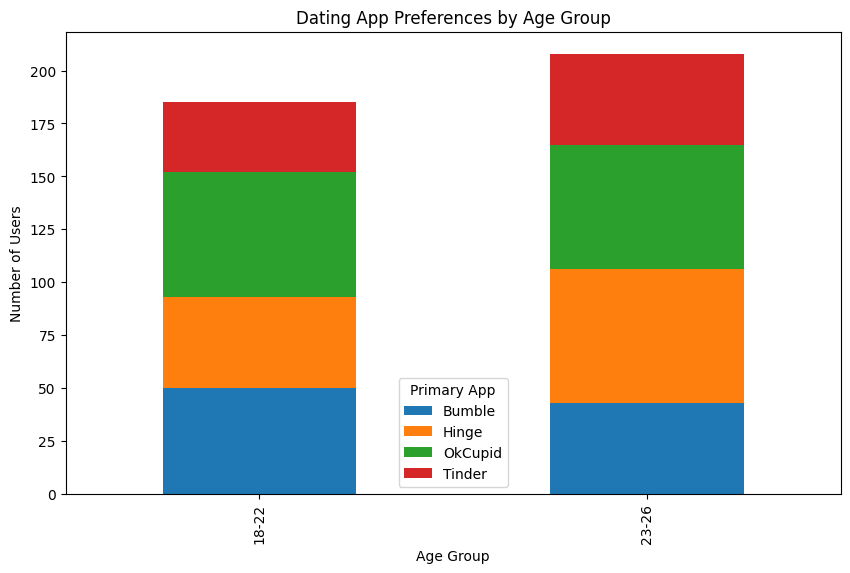

In [8]:
# Dating App Preferences Over Time
over_time.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Dating App Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.legend(title='Primary App')
plt.show()

As we can see on this stacked bar chart, the number of users shifts slightly over time, OkCupid and Bumble are popular among 18-22 age group, Hinge becomes more popular in the 23-26 Age group

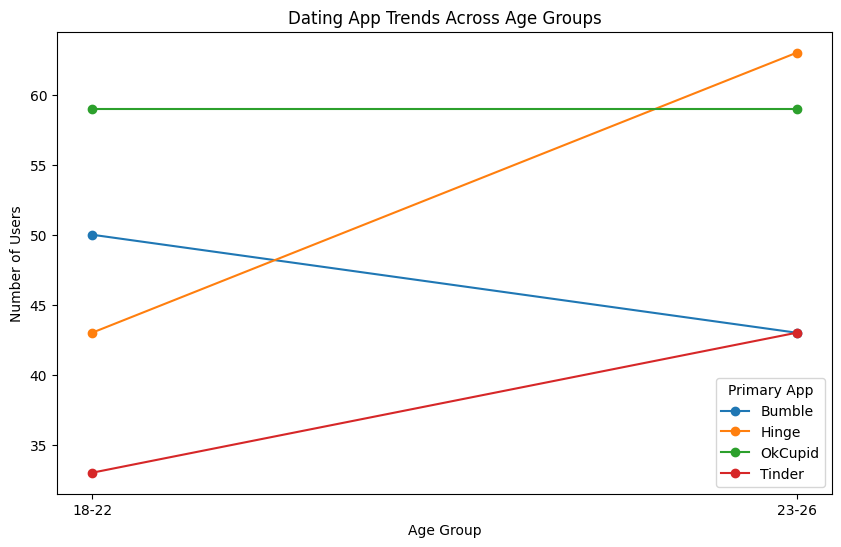

In [11]:
#Line Chart: Track trends over time
over_time = date.groupby(['Age_Group', 'Primary_App'], observed=True).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
for app in over_time.columns:
    plt.plot(over_time.index, over_time[app], marker='o', label=app)
plt.title('Dating App Trends Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.legend(title='Primary App')
plt.show()

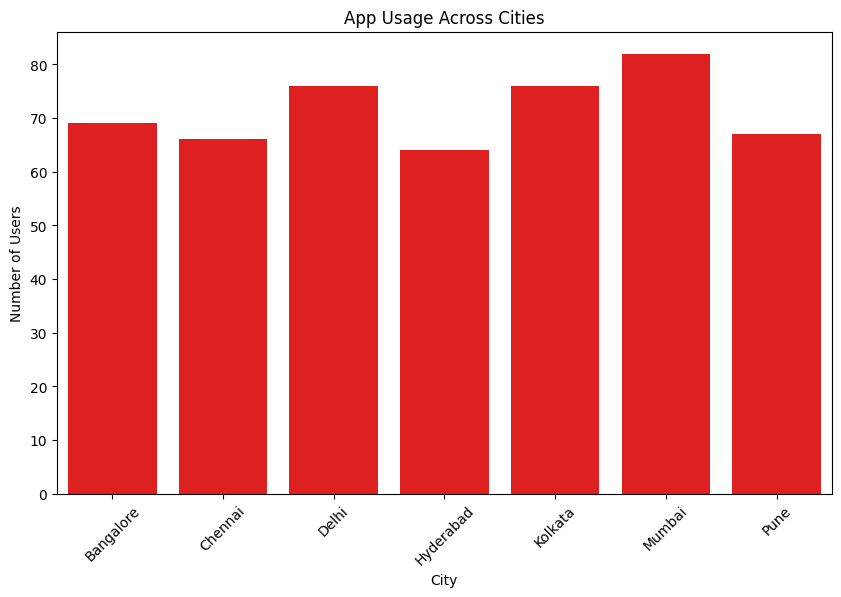

In [14]:
#Geospatial Visualization: App usage across cities
city_usage = date.groupby('Location').size().reset_index(name='User_Count')

# Plotting using a bar chart as a simple geospatial visualization because we dont have exact coordinates
plt.figure(figsize=(10, 6))
sns.barplot(data=city_usage, x='Location', y='User_Count', color='red')
plt.title('App Usage Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


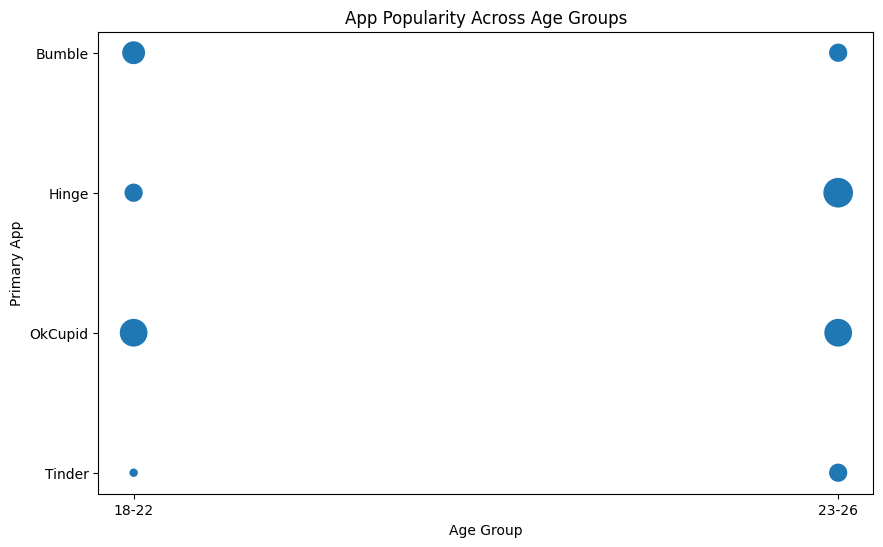

In [19]:
# Grouping the data correctly
age_app_popularity = date.groupby(['Age_Group', 'Primary_App'], observed=True).size().reset_index(name='User_Count')

# Plotting the bubble chart
plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_app_popularity, x='Age_Group', y='Primary_App', size='User_Count', legend=False, sizes=(50, 500))
plt.title('App Popularity Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Primary App')
plt.show()
